### Autoencoder with 3 channels, 1,6,11 [0,2,4]
- April 16, 2018
- datadir = "/media/cjw/Data/cyto/mmFromTifs3"
- checkpoint: "/media/cjw/Data/cyto/Checkpoints/2018-04-16-Chs-0-2-4_32_mmFromTifs3"

In [1]:
import os
import sys
sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

In [3]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/mmFromTifs3"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/mmFromTifs3/Fish6_Untreated.mm', '/media/cjw/Data/cyto/mmFromTifs3/Fish6_ICE.mm', '/media/cjw/Data/cyto/mmFromTifs3/Fish6_CCB.mm']
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
30000


dict_keys(['Fish6_Untreated.mm', 'Fish6_ICE.mm', 'Fish6_CCB.mm'])

In [4]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000


Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 3) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 16, 16, 64) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 4, 4, 256) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 192), dtype=float32)
isize:  4 32
dh0 (?, 32, 32, 3)
[<tf.Tensor 'dropout_3/mul:0' shape=(?, 4096) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 256) dtype=float32>, <tf.Tensor 'dropout_4/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 16, 16, 64) dtype=float32>] Tensor("Minimum:0", shape=(?, 32, 32, 3), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32) Tensor("Mean_2:0", shape=(), dtype=float32) Tensor("add_5:0", shape=(), dtype=float32)
30000 234 128
Epoch:  0 Iteration:  0 Loss:  401.991 3.10561 0.339991


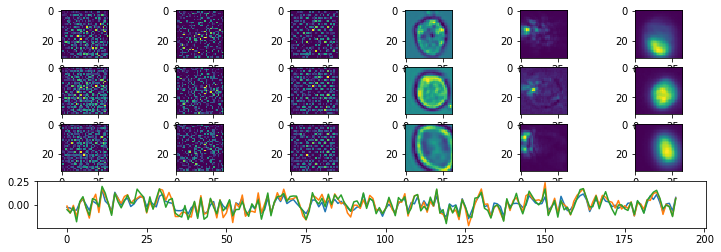

Epoch:  1 Iteration:  0 Loss:  16.2968 0.619819 0.00263819


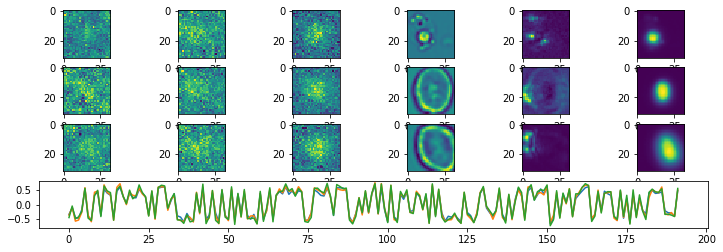

Epoch:  2 Iteration:  0 Loss:  9.79958 0.614687 0.00193274


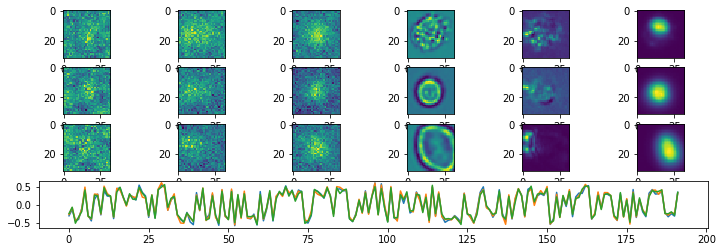

Epoch:  3 Iteration:  0 Loss:  9.36274 0.614382 0.00157189


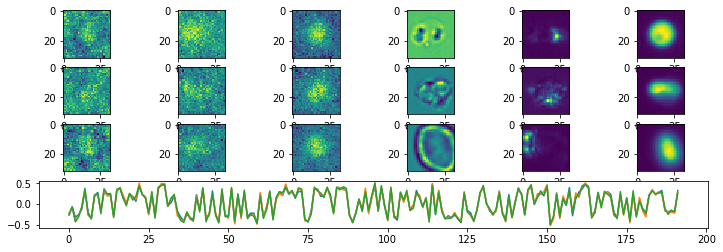

Epoch:  4 Iteration:  0 Loss:  8.91876 0.614025 0.00212556


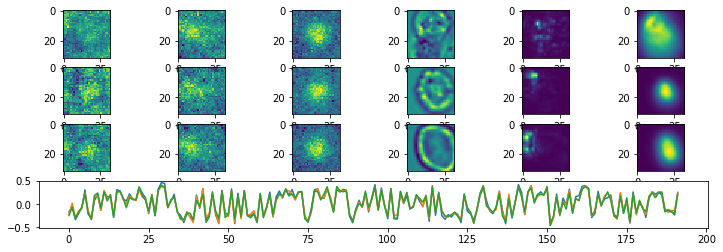

Epoch:  5 Iteration:  0 Loss:  7.7741 0.613238 0.00181586


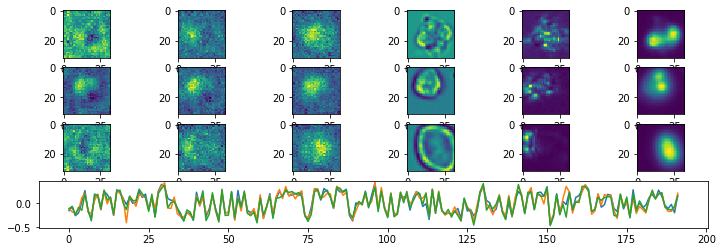

Epoch:  6 Iteration:  0 Loss:  7.21706 0.61287 0.0012376


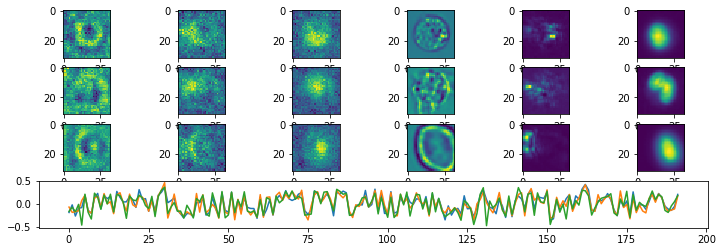

Epoch:  7 Iteration:  0 Loss:  6.21666 0.612149 0.00143838


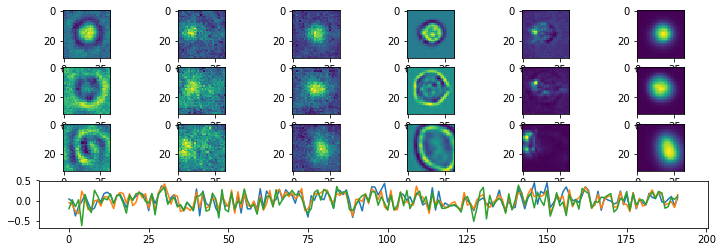

Epoch:  8 Iteration:  0 Loss:  6.27864 0.612179 0.00162831


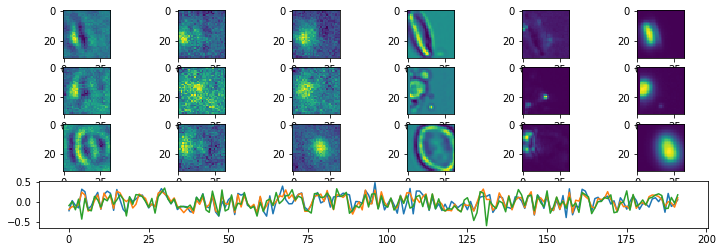

Epoch:  9 Iteration:  0 Loss:  5.13393 0.611375 0.00106087


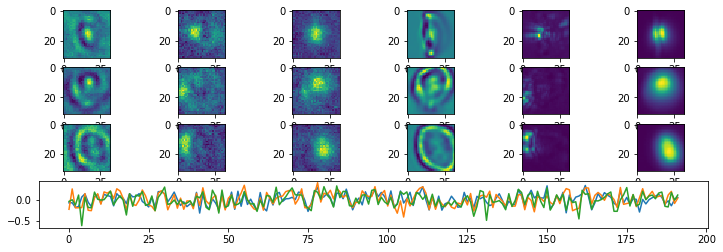

Epoch:  10 Iteration:  0 Loss:  4.74688 0.611097 0.000638694


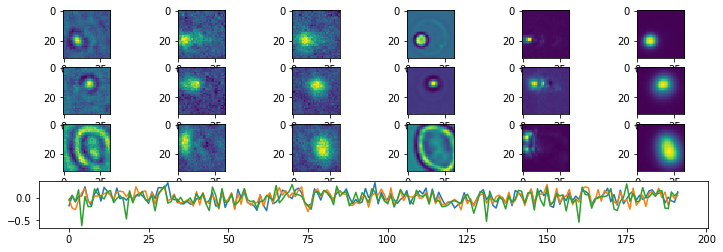

Epoch:  11 Iteration:  0 Loss:  4.62269 0.611015 0.000704378


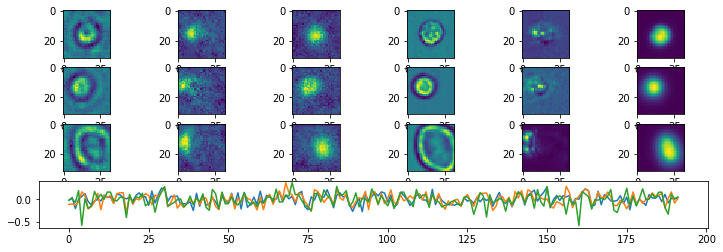

Epoch:  12 Iteration:  0 Loss:  4.3606 0.610829 0.000468999


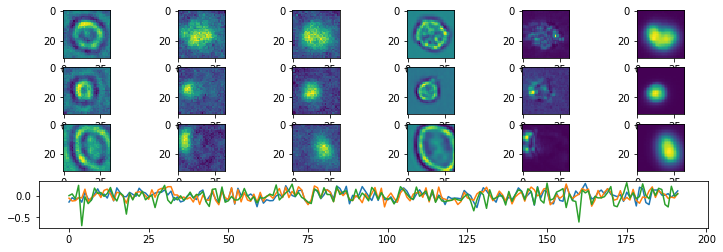

Epoch:  13 Iteration:  0 Loss:  4.07921 0.610624 0.000781417


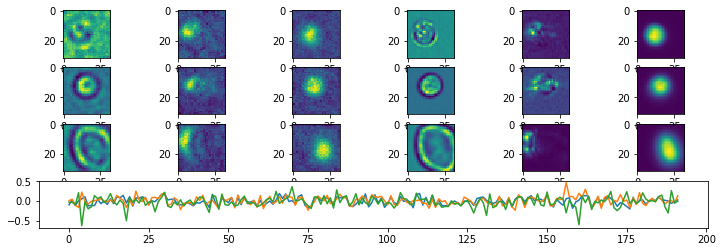

Epoch:  14 Iteration:  0 Loss:  3.91219 0.610504 0.000569552


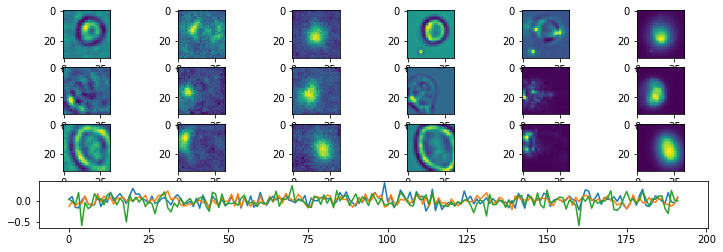

Epoch:  15 Iteration:  0 Loss:  3.7454 0.610387 0.000824541


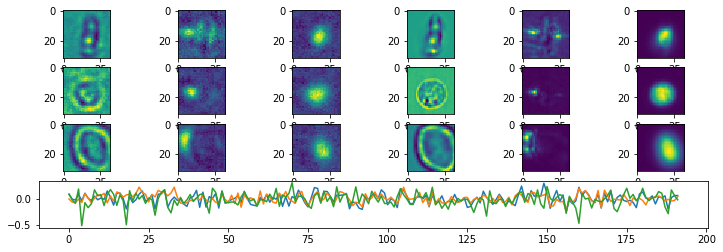

Epoch:  16 Iteration:  0 Loss:  3.61783 0.610296 0.000648826


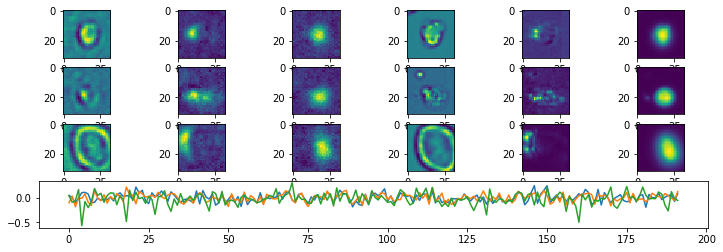

Epoch:  17 Iteration:  0 Loss:  3.48491 0.610203 0.000509977


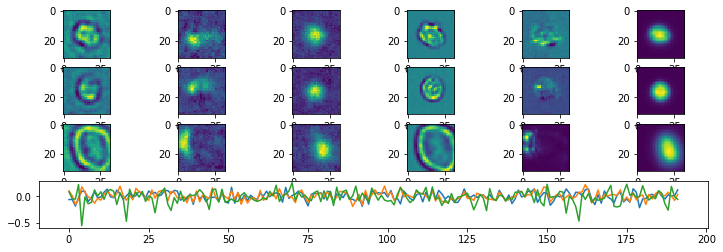

Epoch:  18 Iteration:  0 Loss:  3.36382 0.610116 0.000615984


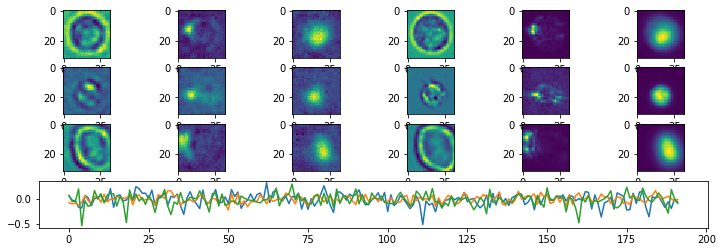

Epoch:  19 Iteration:  0 Loss:  3.26688 0.610048 0.00051403


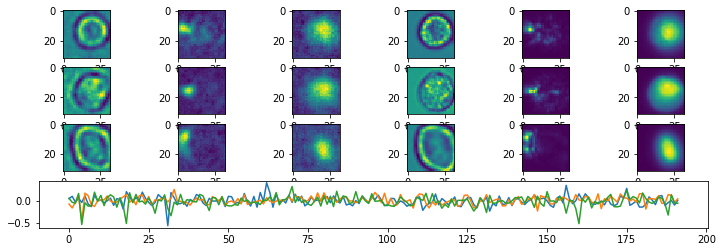

Epoch:  20 Iteration:  0 Loss:  3.17981 0.609987 0.000269145


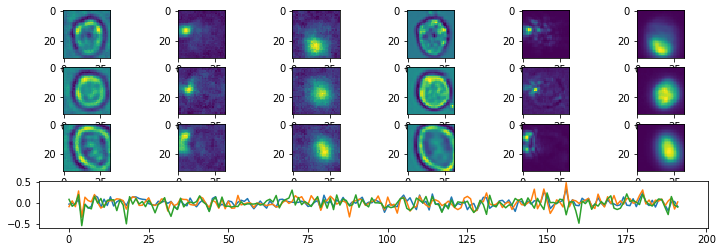

Epoch:  21 Iteration:  0 Loss:  3.08587 0.609921 0.000460029


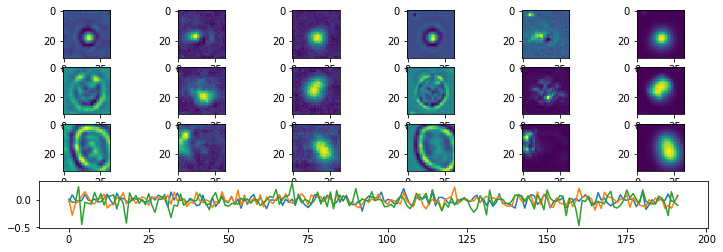

Epoch:  22 Iteration:  0 Loss:  3.03754 0.609887 0.000447214


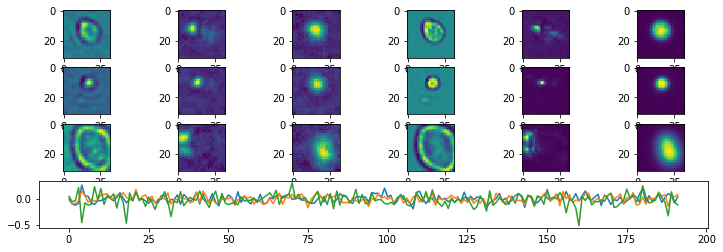

Epoch:  23 Iteration:  0 Loss:  2.97115 0.609839 0.000336915


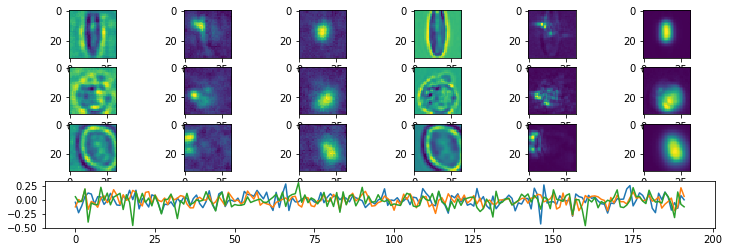

Epoch:  24 Iteration:  0 Loss:  2.88275 0.609777 0.000285327


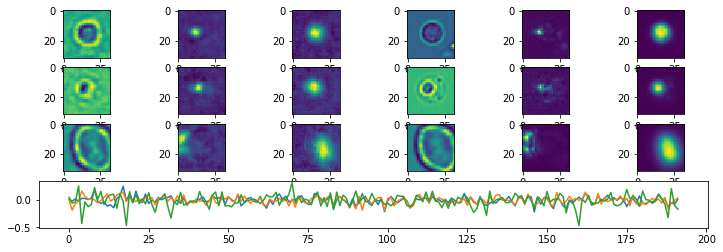

Epoch:  25 Iteration:  0 Loss:  2.81222 0.609728 0.000379801


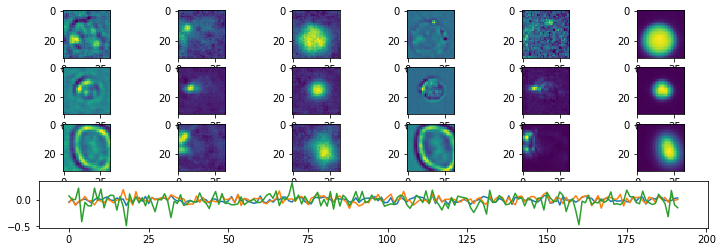

Epoch:  26 Iteration:  0 Loss:  2.76694 0.609694 0.00032708


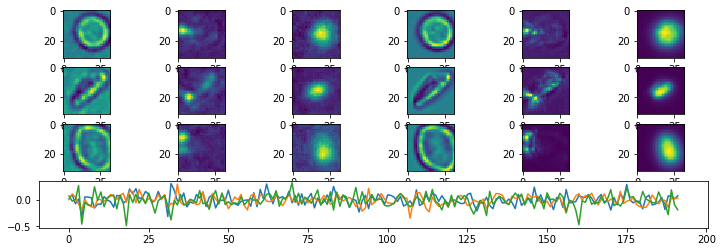

Epoch:  27 Iteration:  0 Loss:  2.78278 0.609703 0.00118035


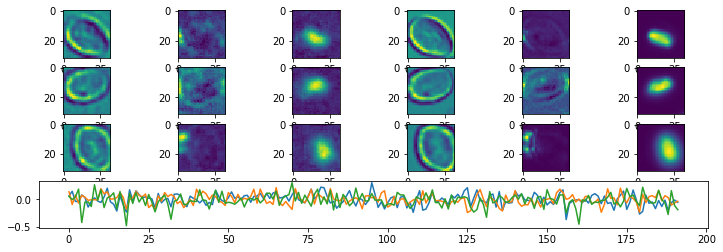

Epoch:  28 Iteration:  0 Loss:  2.65289 0.609616 0.000185072


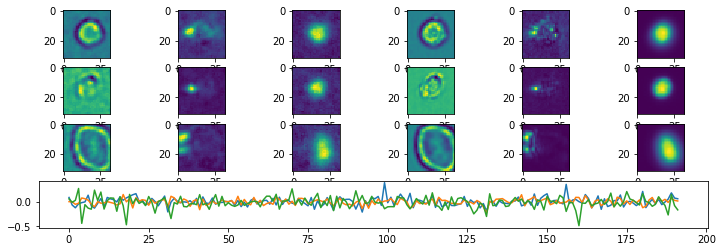

Epoch:  29 Iteration:  0 Loss:  2.605 0.609581 0.00045222


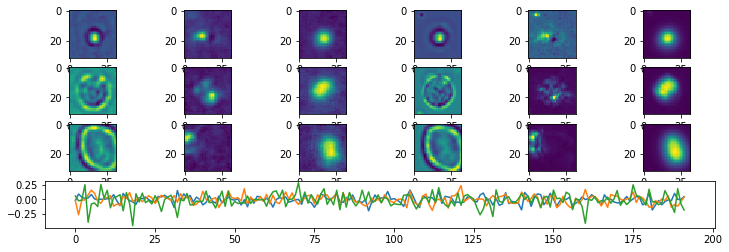

Epoch:  30 Iteration:  0 Loss:  2.55842 0.609549 0.000232995


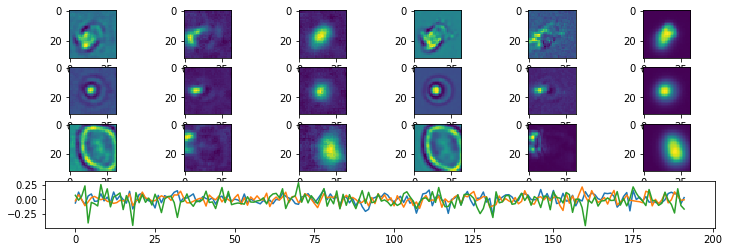

Epoch:  31 Iteration:  0 Loss:  2.51931 0.60952 0.000559866


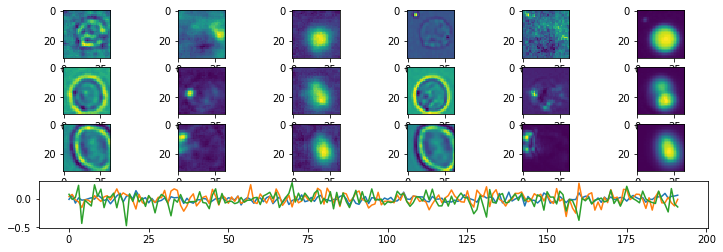

Epoch:  32 Iteration:  0 Loss:  2.50888 0.609515 0.000128984


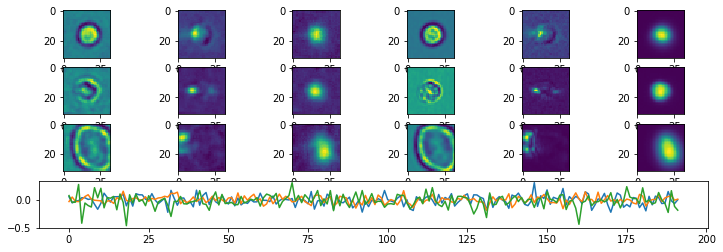

Epoch:  33 Iteration:  0 Loss:  2.45242 0.609473 0.000409245


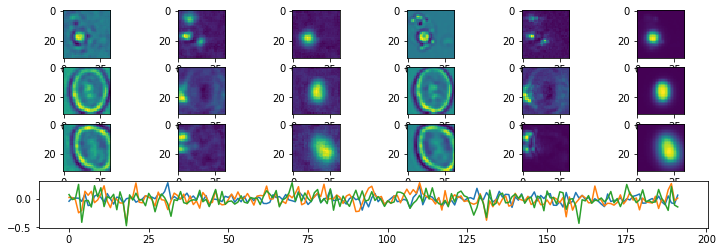

Epoch:  34 Iteration:  0 Loss:  2.42508 0.609455 0.00049302


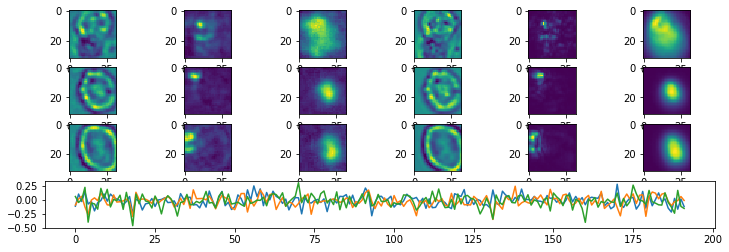

Epoch:  35 Iteration:  0 Loss:  2.37328 0.609417 0.000348419


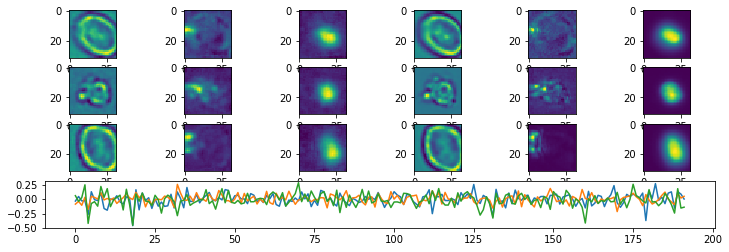

Epoch:  36 Iteration:  0 Loss:  2.36283 0.609411 0.000495404


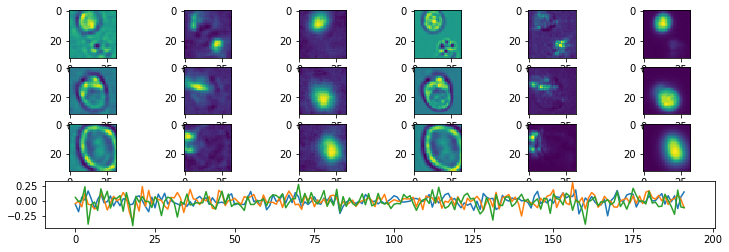

Epoch:  37 Iteration:  0 Loss:  2.3156 0.609377 0.000309944


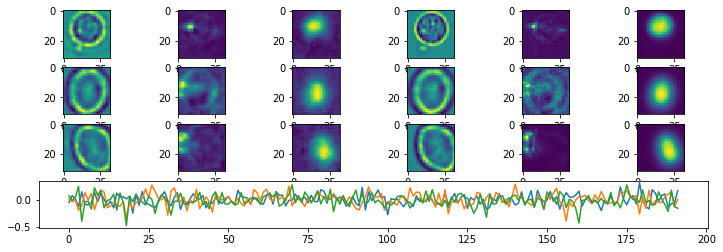

Epoch:  38 Iteration:  0 Loss:  2.31017 0.609372 0.000674576


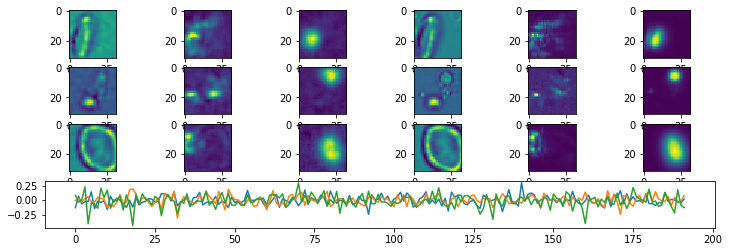

Epoch:  39 Iteration:  0 Loss:  2.26841 0.609344 0.000492722


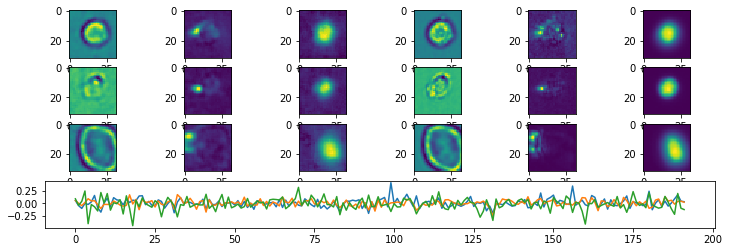

Epoch:  40 Iteration:  0 Loss:  2.25289 0.609333 0.000290513


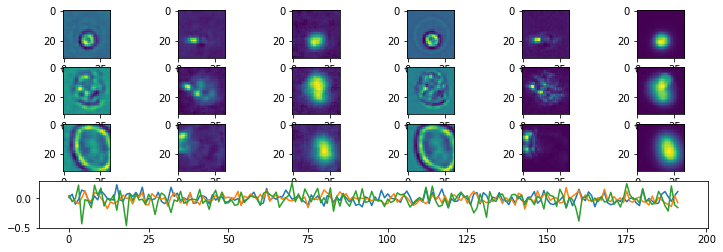

Epoch:  41 Iteration:  0 Loss:  2.21738 0.609308 0.000421345


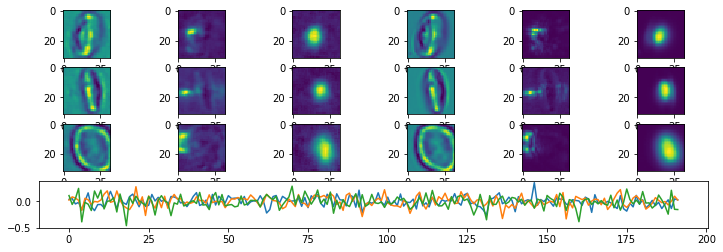

Epoch:  42 Iteration:  0 Loss:  2.21219 0.609306 0.000921249


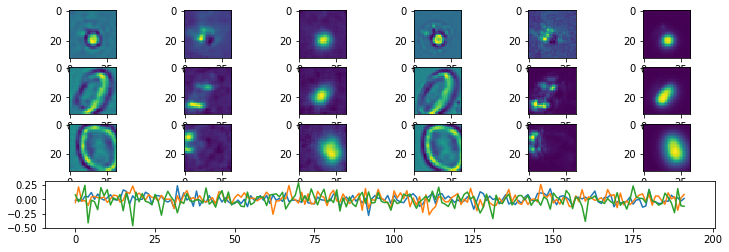

Epoch:  43 Iteration:  0 Loss:  2.18183 0.609283 0.00032863


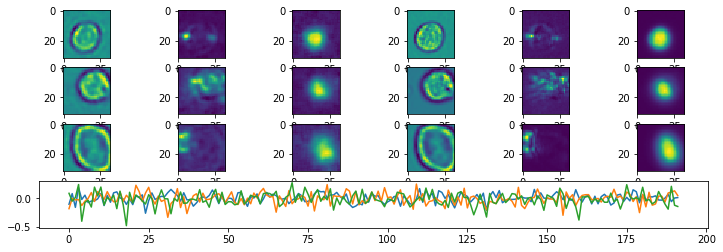

Epoch:  44 Iteration:  0 Loss:  2.17955 0.609281 0.000287473


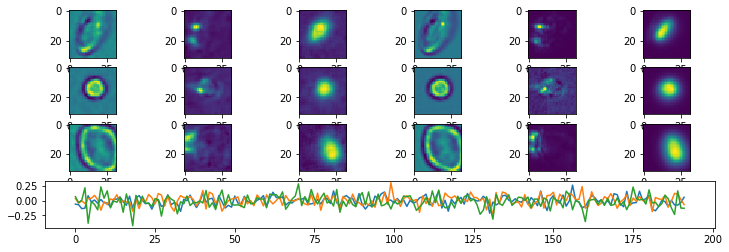

Epoch:  45 Iteration:  0 Loss:  2.16352 0.60927 0.000467479


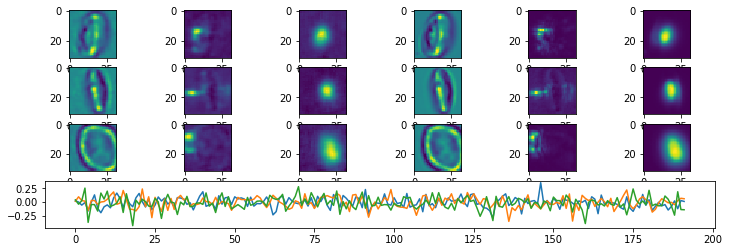

Epoch:  46 Iteration:  0 Loss:  2.13907 0.609253 0.000563055


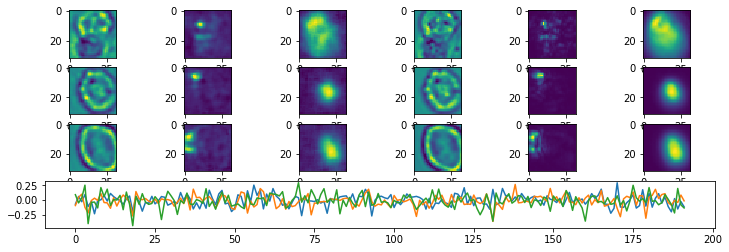

Epoch:  47 Iteration:  0 Loss:  2.11911 0.60924 0.000274122


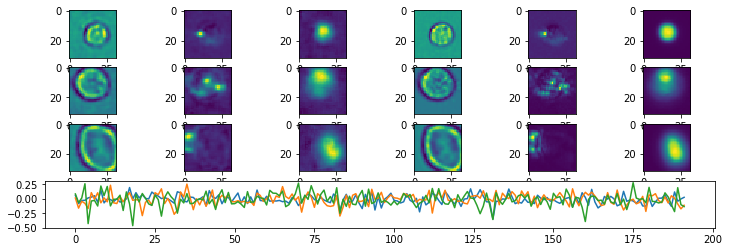

Epoch:  48 Iteration:  0 Loss:  2.10642 0.60923 0.000252813


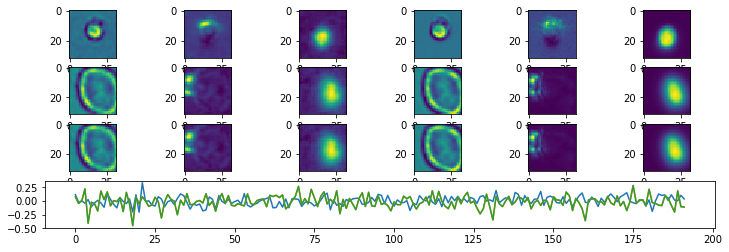

Epoch:  49 Iteration:  0 Loss:  2.09477 0.609221 0.000445217


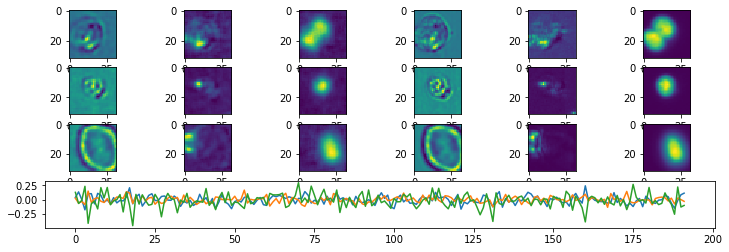

Epoch:  50 Iteration:  0 Loss:  2.09079 0.609219 2.47359e-05


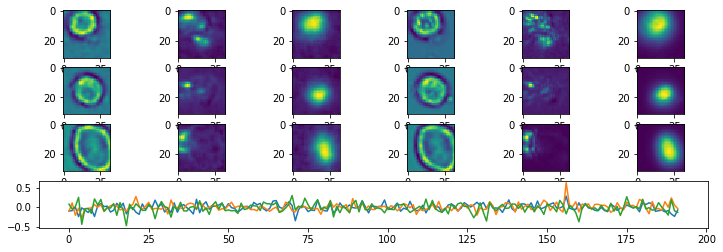

Epoch:  51 Iteration:  0 Loss:  2.08529 0.609215 0.000362456


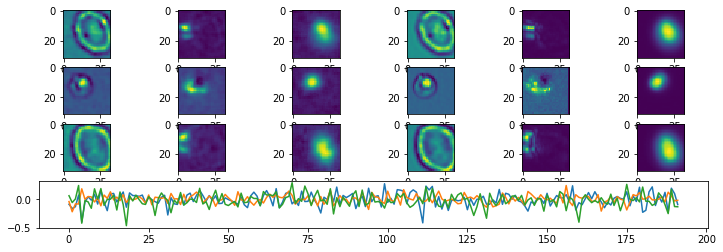

Epoch:  52 Iteration:  0 Loss:  2.07104 0.609205 7.37309e-05


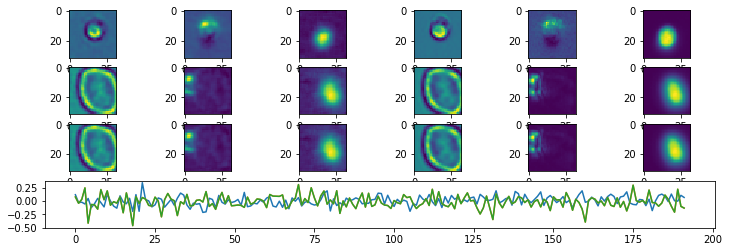

Epoch:  53 Iteration:  0 Loss:  2.05275 0.609192 2.72095e-05


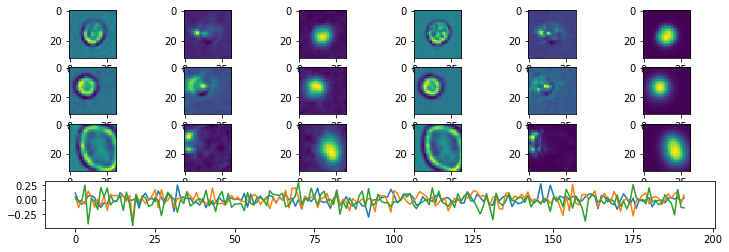

Epoch:  54 Iteration:  0 Loss:  2.04579 0.609188 0.000467092


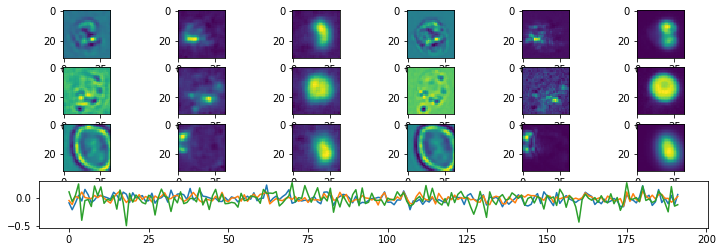

Epoch:  55 Iteration:  0 Loss:  2.03101 0.609177 0.000425577


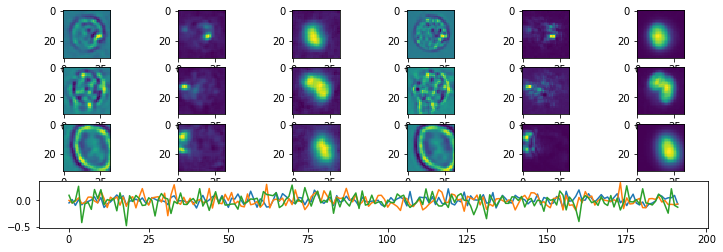

Epoch:  56 Iteration:  0 Loss:  2.01879 0.609169 0.000584006


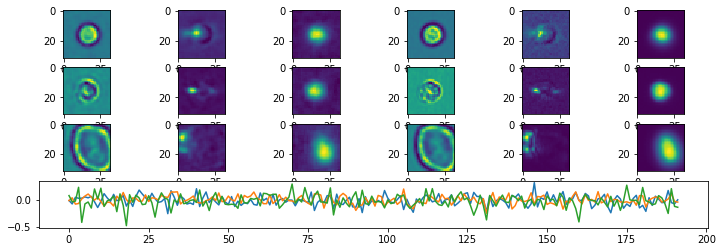

Epoch:  57 Iteration:  0 Loss:  2.0213 0.60917 0.000637025


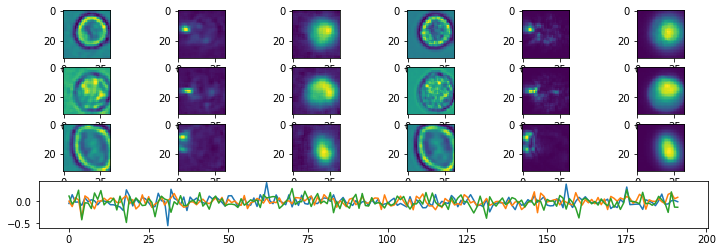

Epoch:  58 Iteration:  0 Loss:  2.0219 0.60917 0.000525534


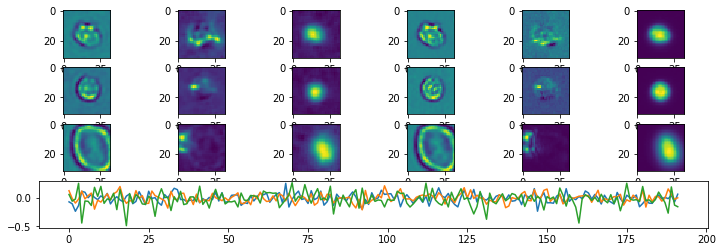

Epoch:  59 Iteration:  0 Loss:  1.99636 0.609153 0.00021103


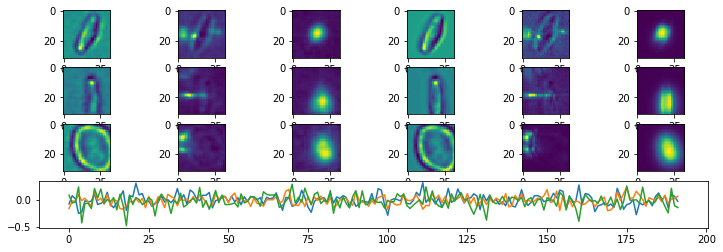

Done


In [5]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 3
p_channels = [0,2,4]
p_nepochs = 60
p_batchsize = 128
p_learning_rate = 0.0002  #.00005
p_restore = False
p_latent_size = 192 #128 + 64
p_droprate = 0.95
p_stdev = .04

enc_sizes = [(64, 3), (128, 3), (256, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-04-16-Chs-0-2-4_32_mmFromTifs3"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 500, cpdir)

In [7]:
x = 4
x

4